# napari: layers

In the previous chapter, we have loaded a sample image with three channels in the viewer. Each of the channels was turned into an *image layer*. Here we are going to see other types of layers that are useful to annotate and process images. First we open again our sample image:

In [39]:
import napari
from napari.utils import nbscreenshot
import numpy as np

In [40]:
viewer = napari.Viewer()

viewer.open_sample('napari', 'cells3d');

## Image layer

This is the layer type we have already explored in the previous chapter. If we print the current layers:

In [41]:
viewer.layers

[<Image layer 'membrane' at 0x288f22f50>, <Image layer 'nuclei' at 0x28a1474f0>]

we see that both are ```Image``` layers. This layer type can be used for any type of image-like object, i.e. where pixel intensity represents a signal and not e.g. an object like a label image. The ```Labels``` layer is the second layer type we explore now.

## Labels layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_labels.svg" width=40>

The labels layer is where typically show or work on segmentation data, i.e. sets of regions labeled with a single number or label. We can add such a layer by clicking on the corresponding button. By default it will have the same size as the images already opened in the viewer and be filled with 0s. We can also add a label layer with ```add_labels``` however there we need to specify the data to display e.g. an array of zeros:

In [42]:
my_labels = np.zeros(viewer.layers[0].data.shape, dtype=np.uint8)
viewer.add_labels(my_labels)

<Labels layer 'my_labels' at 0x28a2abc40>

We can check that it is now present in our layer list:

In [43]:
viewer.layers

[<Image layer 'membrane' at 0x288f22f50>, <Image layer 'nuclei' at 0x28a1474f0>, <Labels layer 'my_labels' at 0x28a2abc40>]

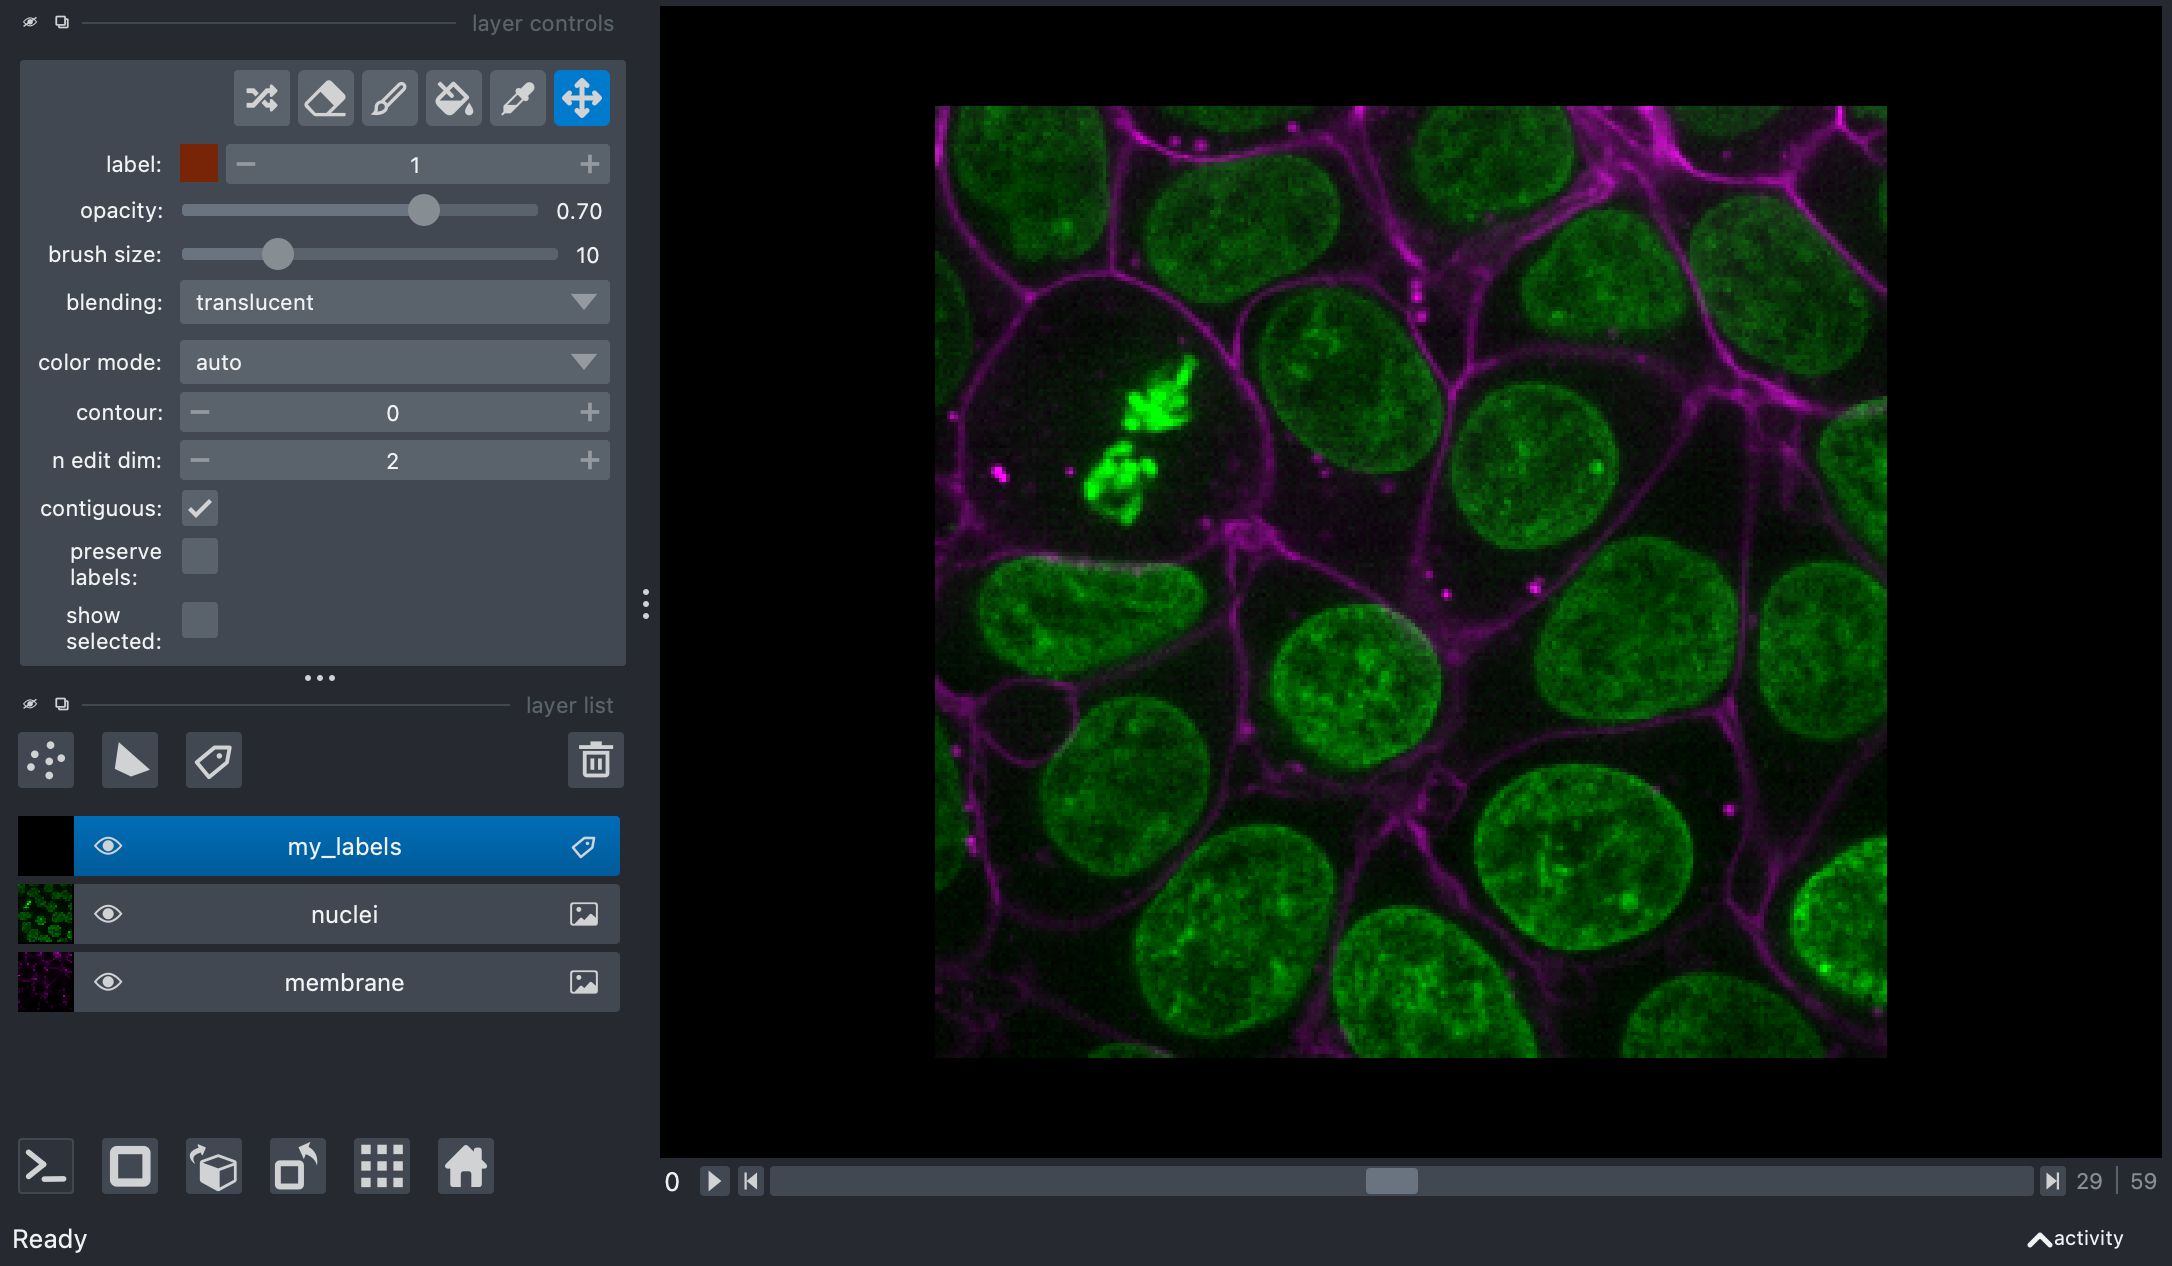

In [44]:
nbscreenshot(viewer, alt_text='Labels layer')

The layer controls have changed: we have now tools to edit the layer, and in particular to draw. The label to edit can be selected with the ```label``` spinbox. Most editing icons are self-explanatory and serve to draw, fill, pick colors etc. as in other software. A few comments on the last elements:

- ```ne edit dim```: allows you to draw in 3D if set to 3
- ```contiguous```: will contiguous/non contiguous parts of a given label when filling
- ```preserve labels```: allows to draw a new label without overwriting existing ones
- ```show selected```: shows only the current label

As for the ```Image``` layer, one can access the label layer data. This is especially useful when we annotate an image and want to recover the annotated regions:

In [45]:
image_labels = viewer.layers['my_labels'].data

In [46]:
image_labels.shape

(60, 256, 256)

### Modifying the labels programmatically

Instead of drawing, we can also act on the label layer from a notebook or script *programmatically*. For example we could threshold a specific plane and insert this in the label layer to e.g. further edit it manually:

In [47]:
import skimage

current_image = viewer.layers['nuclei'].data[29]
im_th = current_image > skimage.filters.threshold_otsu(current_image)

viewer.layers['my_labels'].data[29] = skimage.morphology.label(im_th)

When setting data programmatically, one needs to force the viewer to update the current rendering:

In [48]:
viewer.layers['my_labels'].refresh()

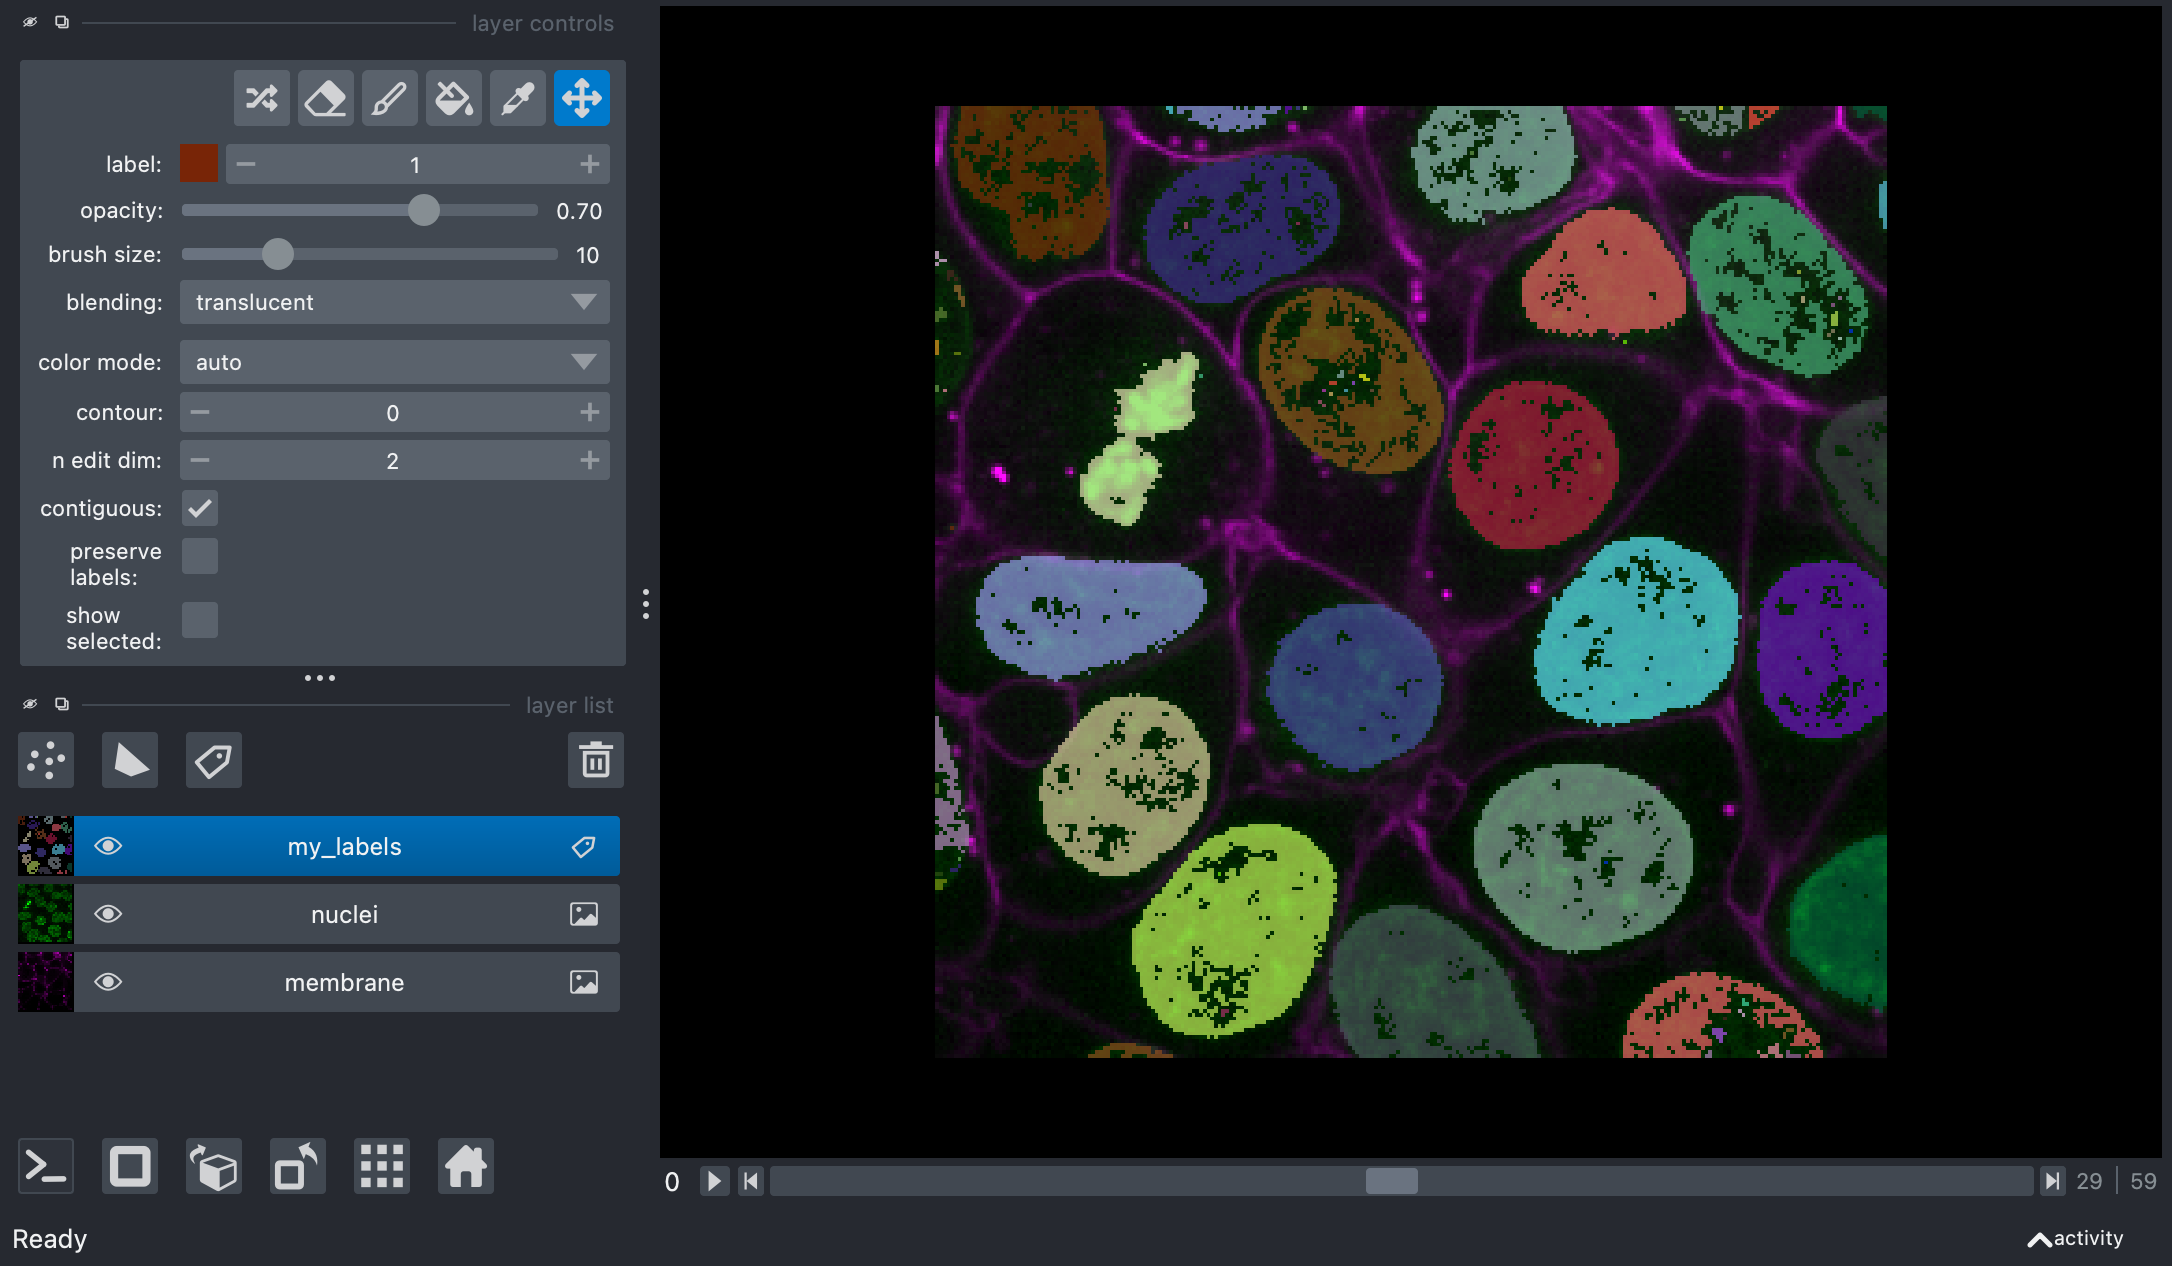

In [49]:
nbscreenshot(viewer, alt_text='Labels layer drawing')

## Shapes layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_shapes.svg" width=40>

The shapes layer roughly corresponds to drawing tools and ROIs that one finds in Fiji. Shapes can be open or closed polygons, each with a specific formatting (colors, thickness etc.). The comparison with ROIs is only limited as napari doesn't contain by default tools to do e.g. measurements in each ROI. There are however extensions to napari that can mimic this behavior. More on extensions (plugins) later on. The various icons appearing in the shapes layer controls are rather self-explanatory.

As for any layer, shapes can also be added and formatted programmatically. Shapes are NxD arrays where N are the location of the vertices of the shapes. By default ```add_shapes``` expects rectangles, i.e. four vertices. If one wants to add other shapes, e.g. a triangle, one has to specify the shape type e.g. ```polygon```. Coordinates need to match the current dimensions displayed. Here we have three dimension and are in plane 29. If we want to add shapes in this z-stack then we need to use coordinates like ```[29, Y, X]```:

In [66]:
viewer.add_shapes([[29,100,100],
                   [29,130,100],
                   [29,120,120],
                  [29,110,120]], edge_color='red', name='Square')

viewer.add_shapes([[29,100,150],
                   [29,150,150],
                   [29,140,170]], shape_type='polygon', edge_color='red', face_color='blue', name='Triangle')

<Shapes layer 'Triangle' at 0x28a4b52a0>

Note that if a shape layer already exists, one can add shapes to it by using specific functions like ```add_paths```:

In [67]:
viewer.layers['Triangle'].add_paths([[29, 50, 50],
                                       [29, 210, 80],
                                       [29, 210, 150],
                                       [29, 190, 200]], edge_color='pink', edge_width=4)

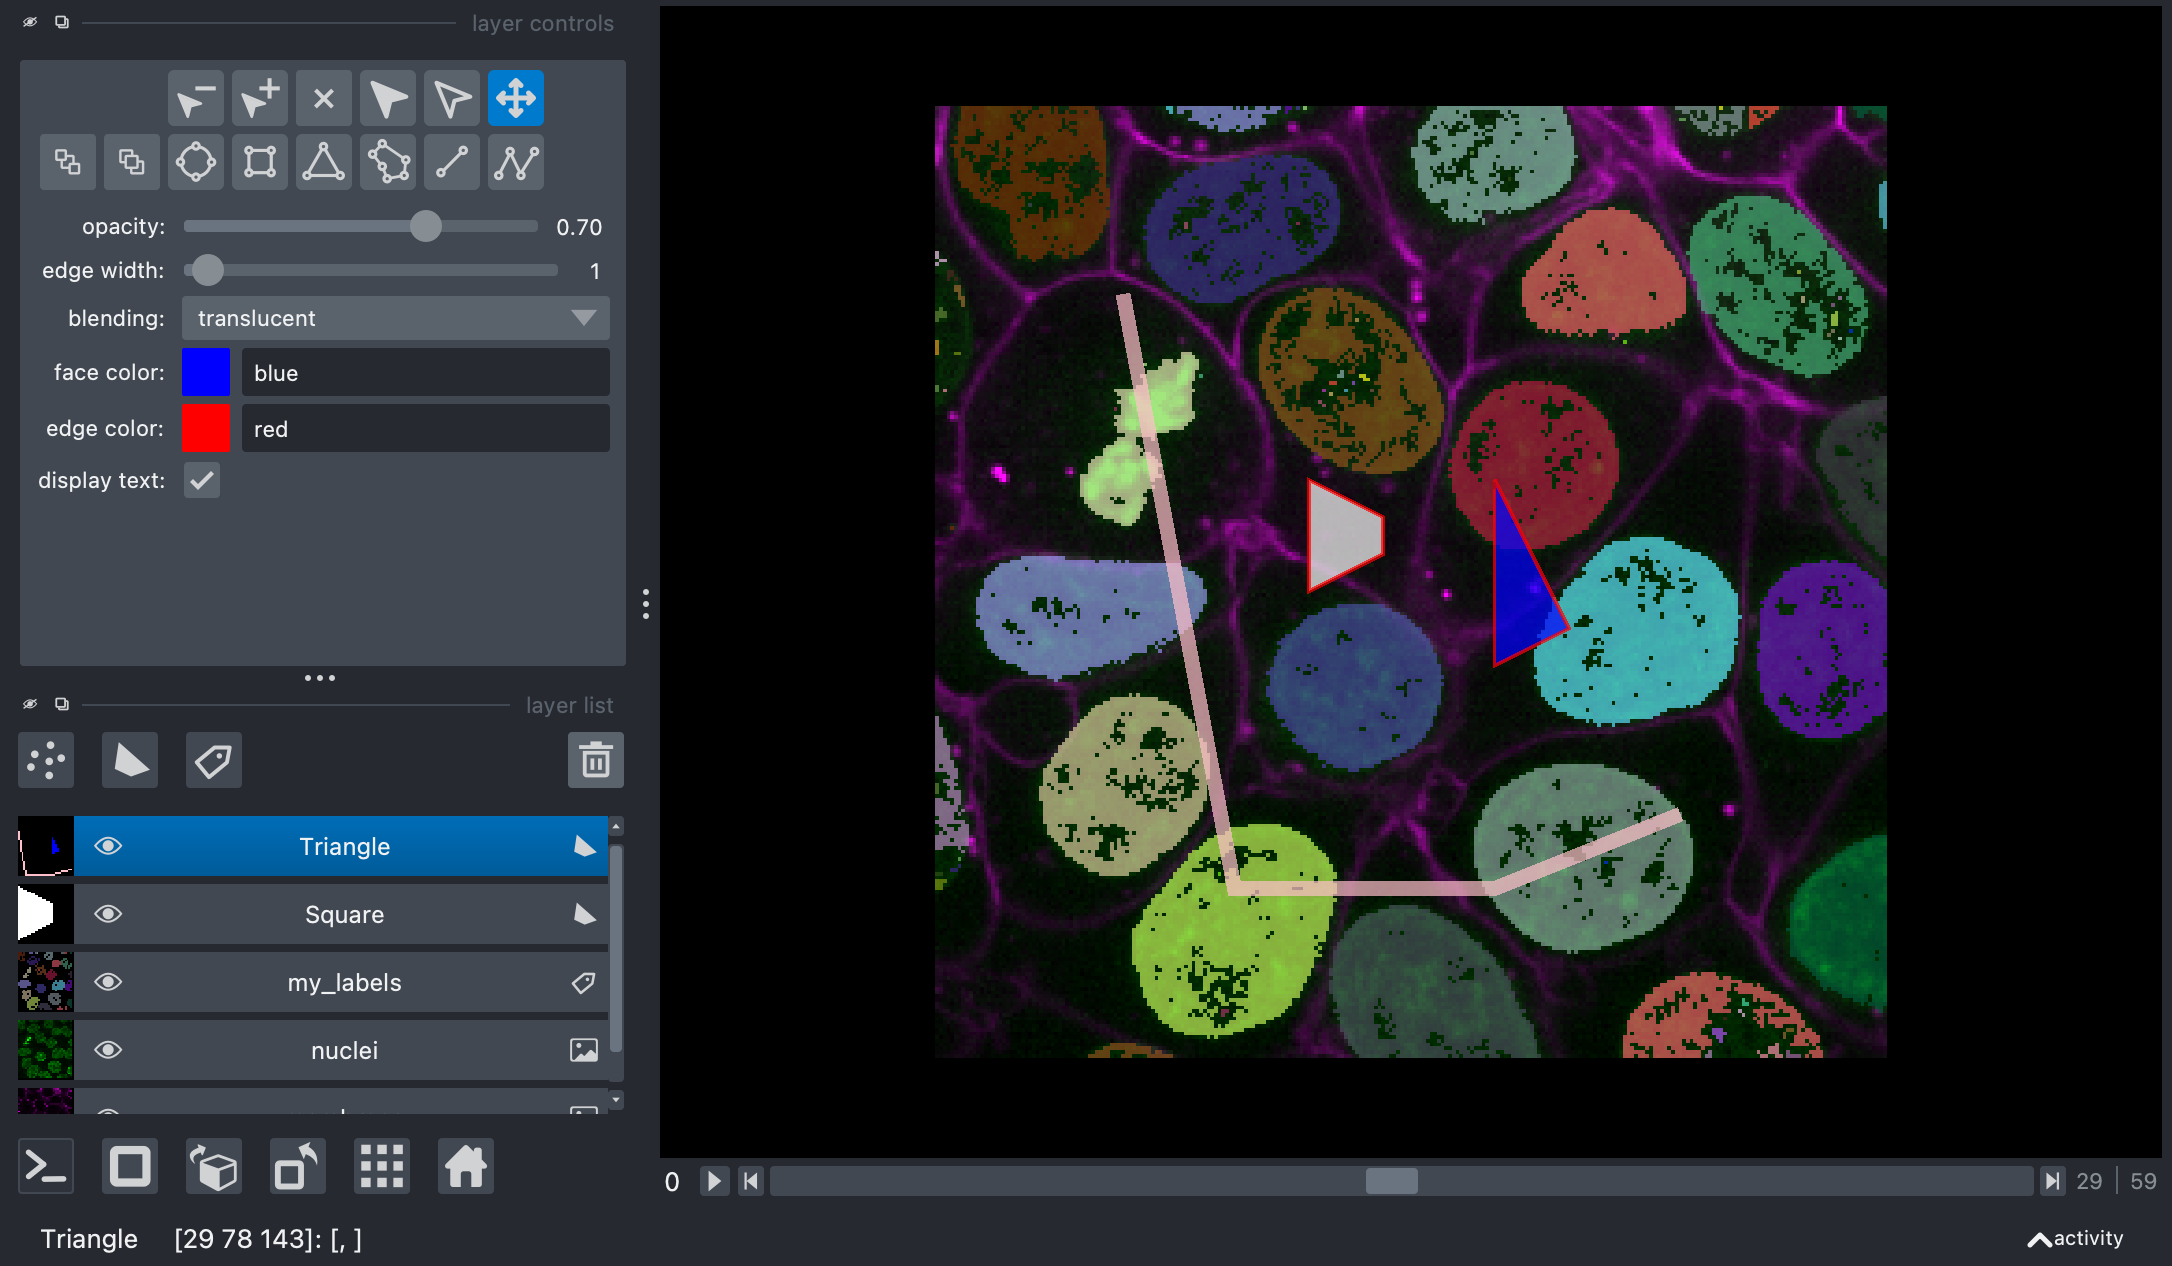

In [68]:
nbscreenshot(viewer, alt_text='Shapes layer drawing')

Again, such coordinates can be recovered and modified programmatically.

In [69]:
viewer.layers['Triangle'].data

[array([[ 29., 100., 150.],
        [ 29., 150., 150.],
        [ 29., 140., 170.]]),
 array([[ 29.,  50.,  50.],
        [ 29., 210.,  80.],
        [ 29., 210., 150.],
        [ 29., 190., 200.]])]

In [70]:
viewer.layers['Triangle'].data[0][0,1] = 10

In [71]:
viewer.layers['Triangle'].refresh()

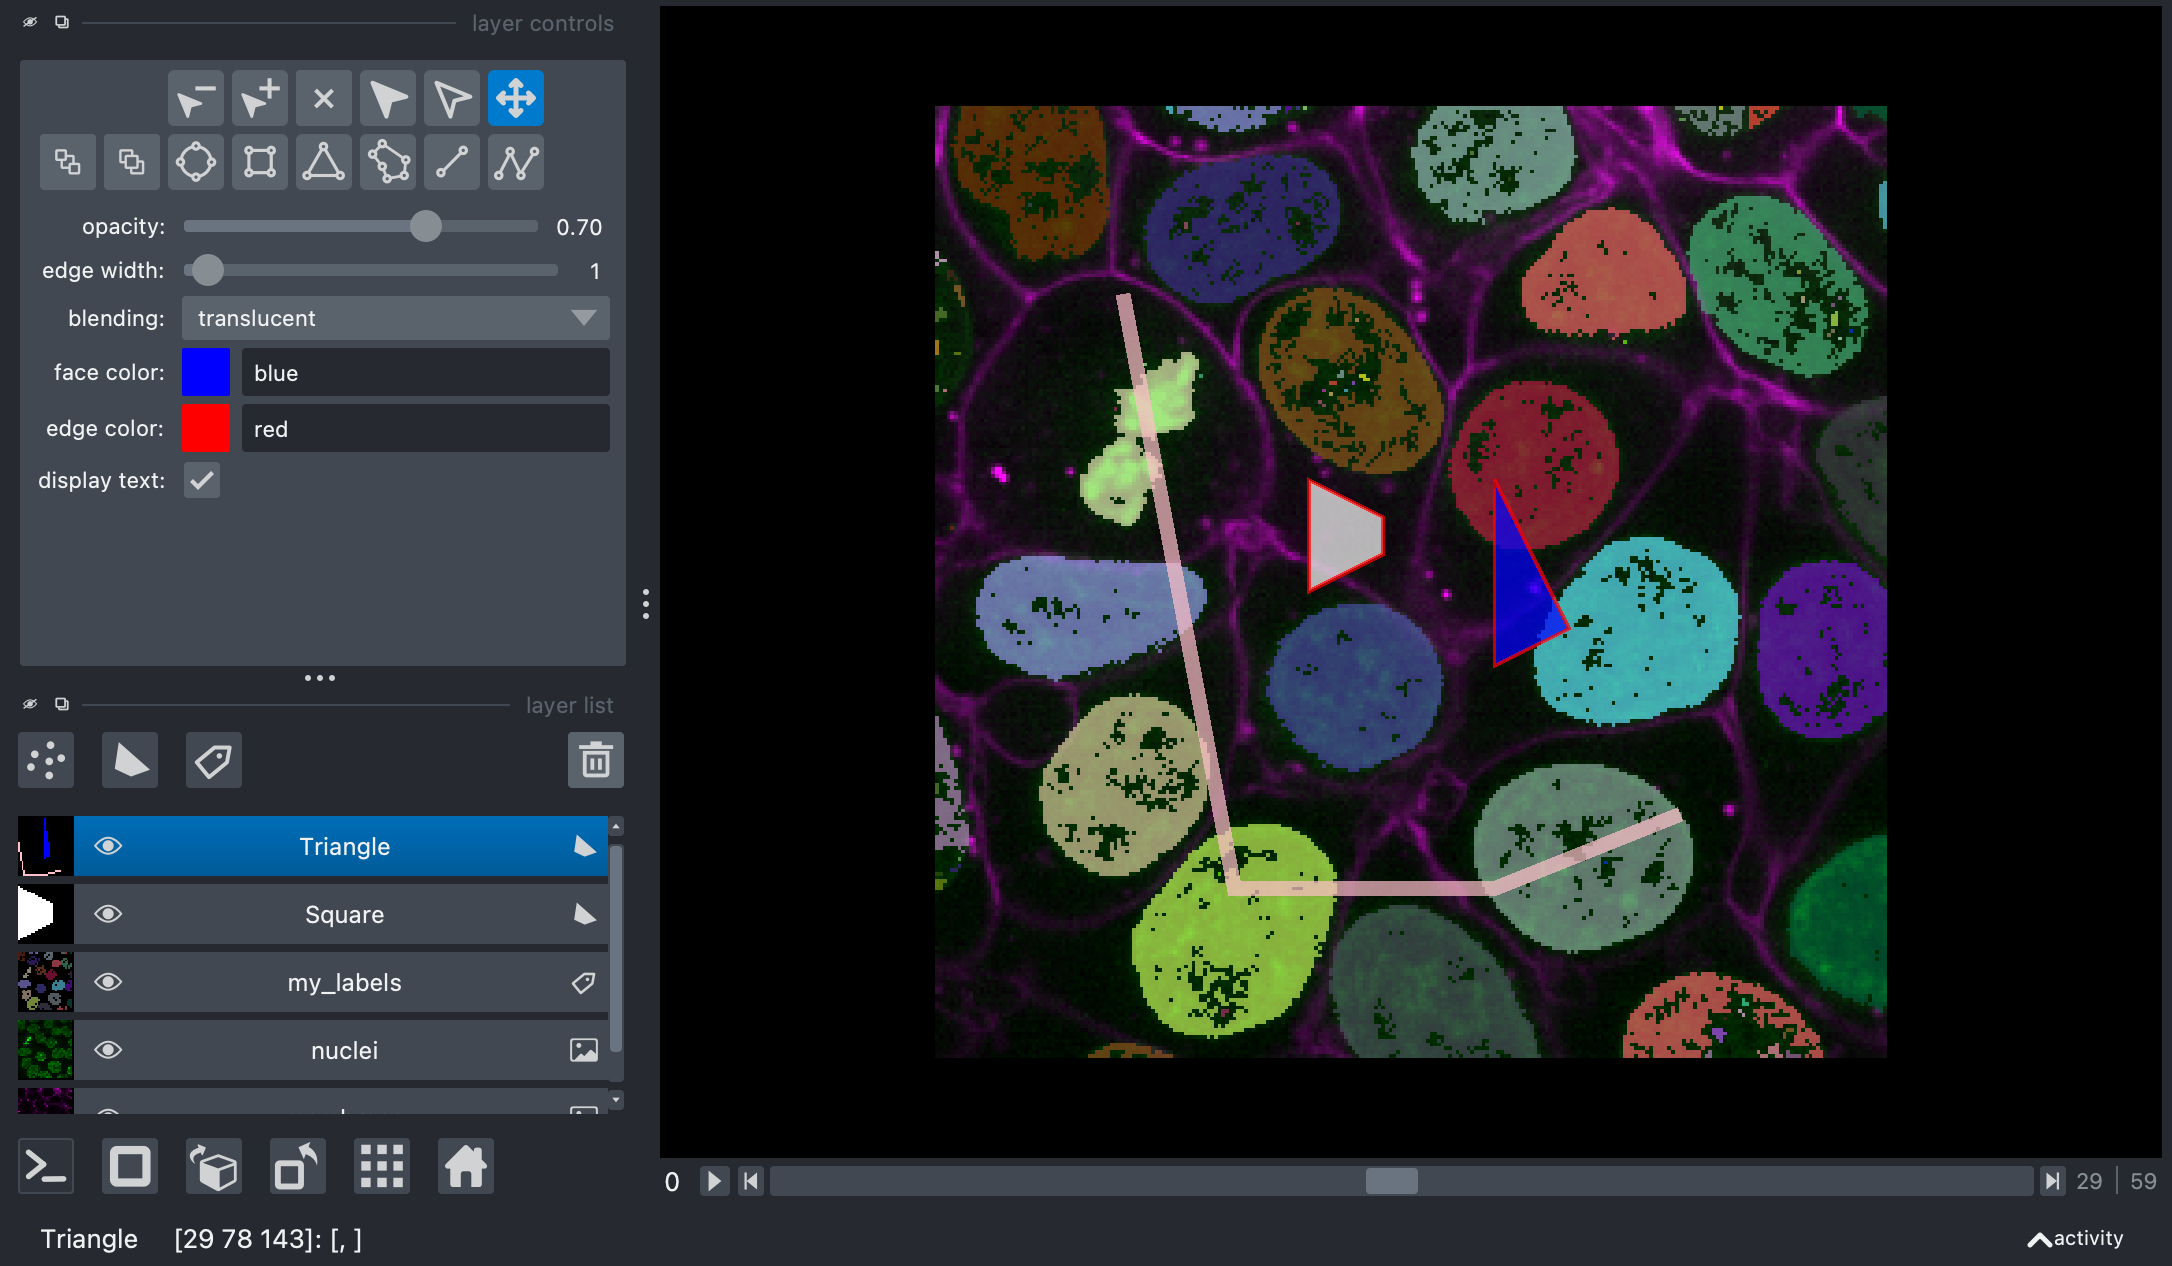

In [72]:
nbscreenshot(viewer, alt_text='Shapes layer drawing')

## Points layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_points.svg" width=40>


The points layer allows to display a collection of points. This can be used for example to select objects or to indicate detection e.g. of small features like spots. Points can be added and modified interactively or with the ```add_points``` function which takes an NxD array of N points in D dimensions:

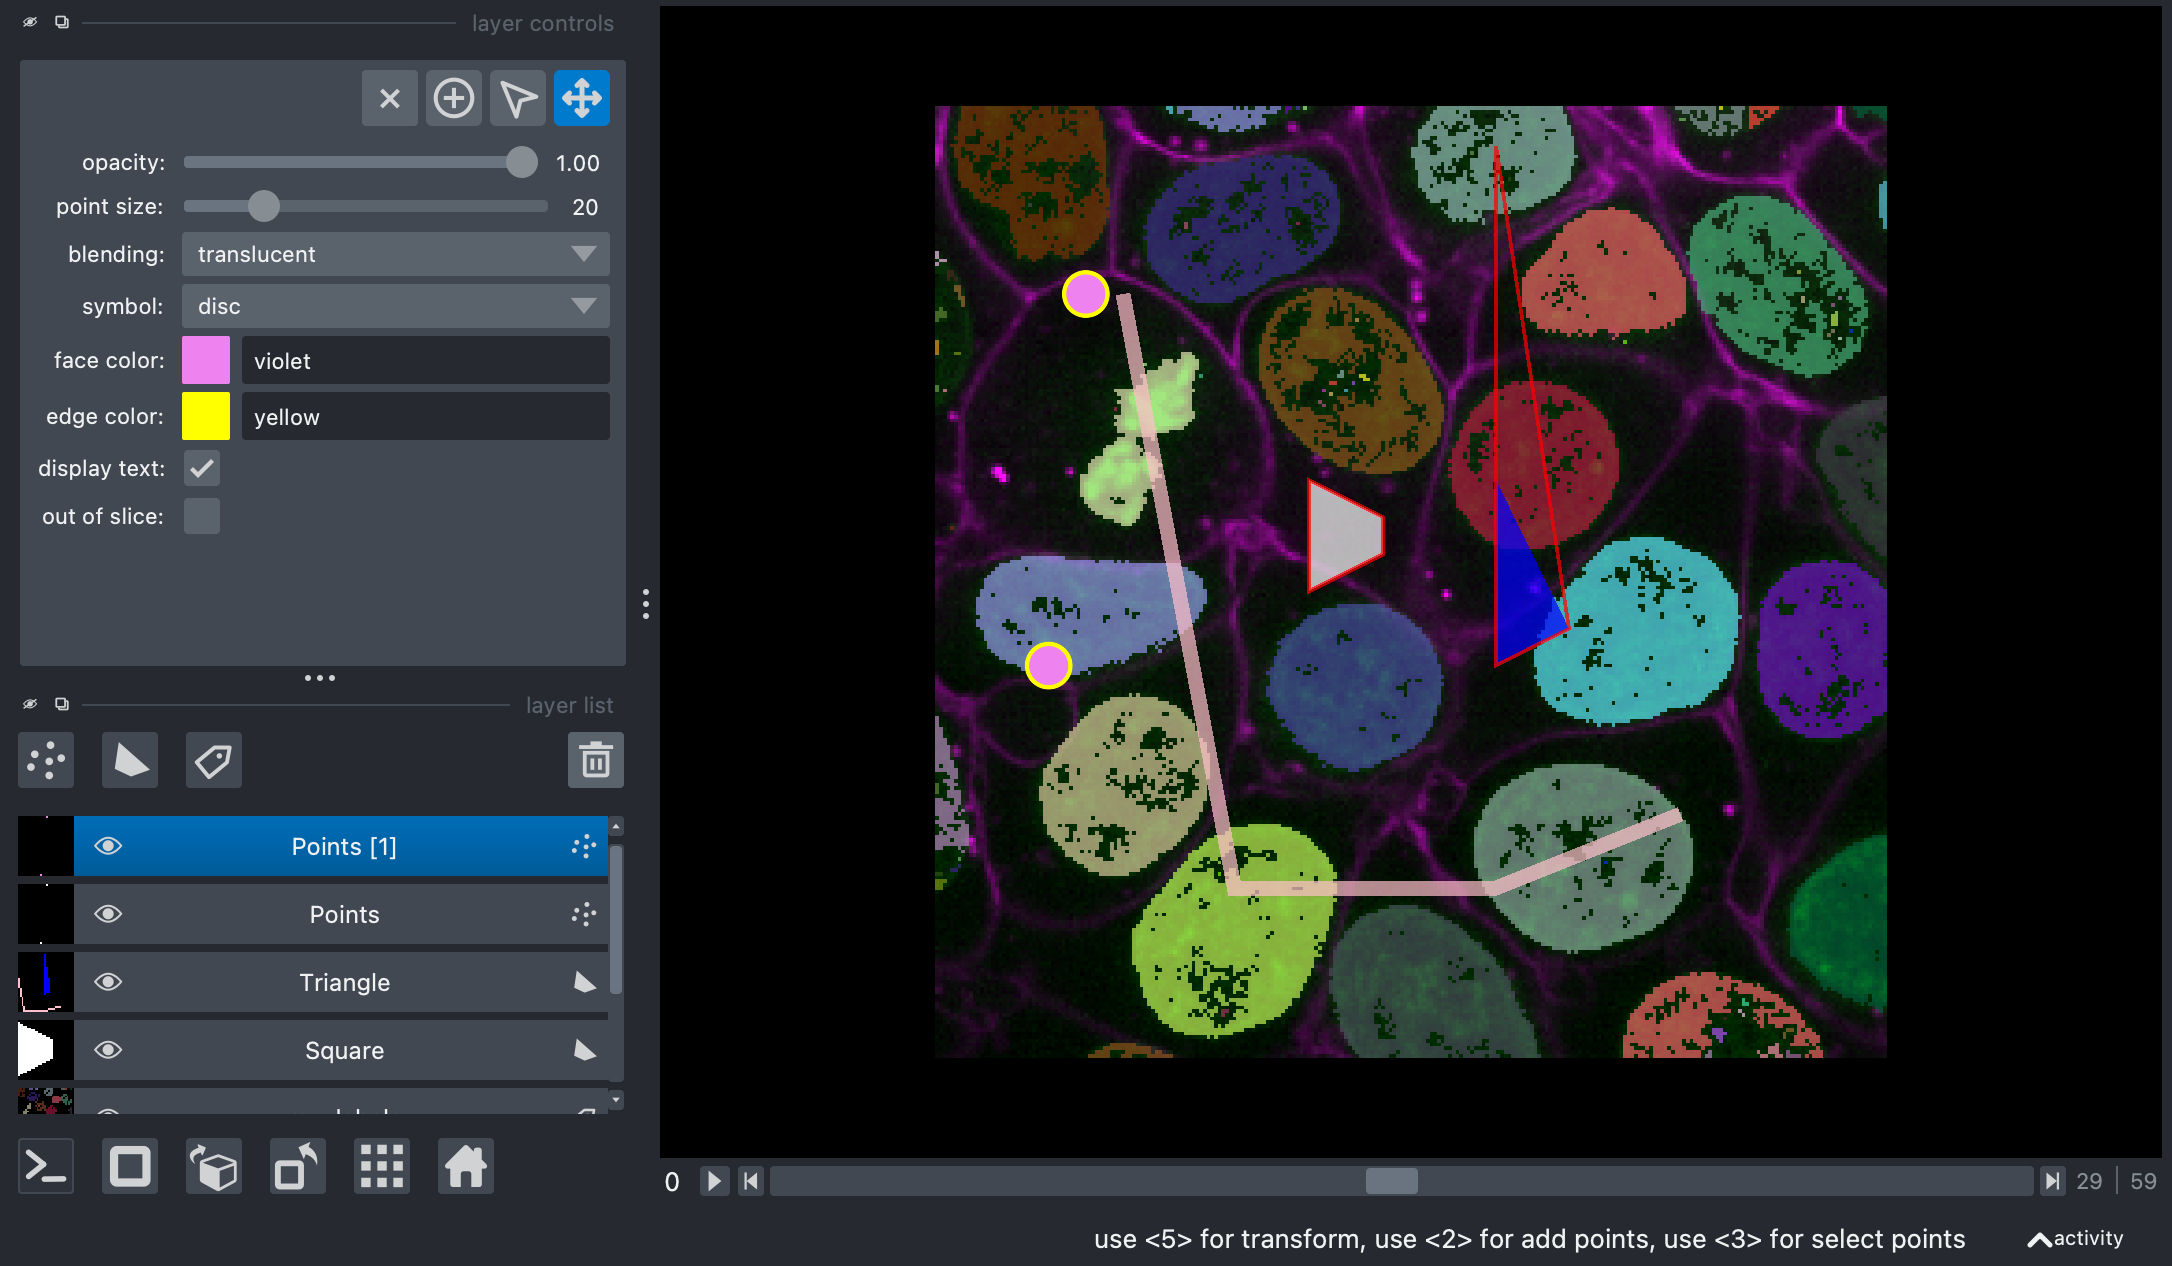

In [78]:
nbscreenshot(viewer)

In [79]:
viewer.layers['Points'].data

array([[ 29,  50,  40],
       [ 29, 150,  30]])

Here, again, we are dealing with list of coordinates, this time a single list of 3D coordinates.

## Additional layers

napari offers three other types of layers, for surfaces, vectors and tracks, which are more application specific than the ones described above. We don't cover them in detail here but you can find infos in the [documentation](https://napari.org/stable/howtos/layers/surface.html).

## Exercises

- Import the cow3d.tiff file in such a way that channels are separate
- Add a Shapes layer and create a small rectangular shape containing a few nuclei
- Add a Labels layer and try to annotate 1-2 nuclei. First on a single plane, then in 3D
- Using the rectangular selection, try to create a crop of the image and labels layers 